In [1]:
import pandas as pd
import re

## 1. Cleaning the Data 

In [2]:
#load data from a csv file
ex_df = pd.read_csv('exercise_dataset.csv')

#inspect the dimensons
print('There are {} rows and {} columns.'.format(ex_df.shape[0], ex_df.shape[1]))

There are 248 rows and 6 columns.


In [3]:
#view samples of the data
ex_df.head()

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825


In [4]:
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Activity, Exercise or Sport (1 hour)  248 non-null    object 
 1   130 lb                                248 non-null    int64  
 2   155 lb                                248 non-null    int64  
 3   180 lb                                248 non-null    int64  
 4   205 lb                                248 non-null    int64  
 5   Calories per kg                       248 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 11.8+ KB


In [5]:
#check the frequency of null values in each column
ex_df.isnull().sum()

Activity, Exercise or Sport (1 hour)    0
130 lb                                  0
155 lb                                  0
180 lb                                  0
205 lb                                  0
Calories per kg                         0
dtype: int64

In [6]:
#count the frequency of missing values in each row (i.e. how many columns are empty)
ex_df.isnull().sum(axis=1).sort_values(ascending = False) 


0      0
170    0
157    0
158    0
159    0
      ..
87     0
88     0
89     0
90     0
247    0
Length: 248, dtype: int64

In [7]:
ex_df.drop_duplicates(inplace=True) #remove any duplicate rows

In [8]:
ex_df.shape

(248, 6)

## 2. Summarize and Visualize Data 

    Activity, Exercise or Sport (1 hour)  130 lb  155 lb  180 lb  205 lb  \
47      Running, 10.9 mph (5.5 min mile)    1062    1267    1471    1675   
217         Cross country skiing, uphill     974    1161    1348    1536   
2               Cycling, >20 mph, racing     944    1126    1308    1489   
46          Running, 10 mph (6 min mile)     944    1126    1308    1489   
188                    Skin diving, fast     944    1126    1308    1489   
45         Running, 9 mph (6.5 min mile)     885    1056    1226    1396   
51                   Running, stairs, up     885    1056    1226    1396   
212      Speed skating, ice, competitive     885    1056    1226    1396   
44         Running, 8.6 mph (7 min mile)     826     985    1144    1303   
216         Cross country skiing, racing     826     985    1144    1303   

     Calories per kg  
47          3.706591  
217         3.397878  
2           3.294974  
46          3.294974  
188         3.294974  
45          3.089165  
51

<AxesSubplot:xlabel='Activity, Exercise or Sport (1 hour)'>

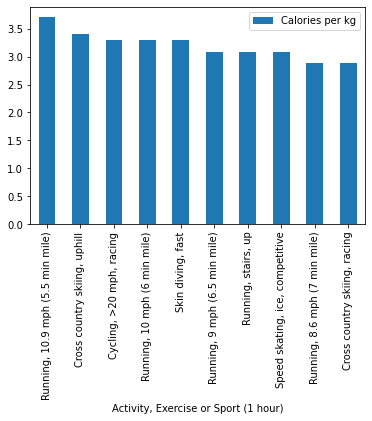

In [9]:
# determine top ten activities for calories burning -- each given weight and then overall
# overall 
top_ten = ex_df.nlargest(10, 'Calories per kg')
print(top_ten)
top_ten.plot(x = 'Activity, Exercise or Sport (1 hour)', y = 'Calories per kg', kind='bar')

47     Running, 10.9 mph (5.5 min mile)
217        Cross country skiing, uphill
2              Cycling, >20 mph, racing
46         Running, 10 mph (6 min mile)
188                   Skin diving, fast
45        Running, 9 mph (6.5 min mile)
51                  Running, stairs, up
212     Speed skating, ice, competitive
44        Running, 8.6 mph (7 min mile)
216        Cross country skiing, racing
Name: Activity, Exercise or Sport (1 hour), dtype: object


<AxesSubplot:xlabel='Activity, Exercise or Sport (1 hour)'>

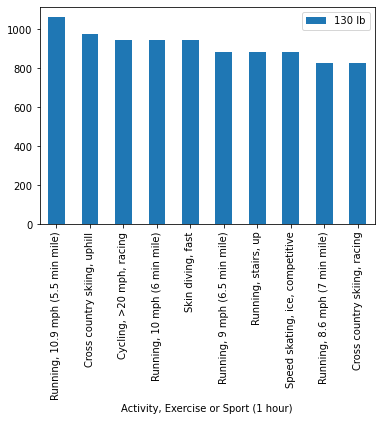

In [10]:
# 130 lbs 
top_ten = ex_df.nlargest(10, '130 lb')
print(top_ten["Activity, Exercise or Sport (1 hour)"])
top_ten.plot(x = 'Activity, Exercise or Sport (1 hour)', y = '130 lb', kind='bar')

47     Running, 10.9 mph (5.5 min mile)
217        Cross country skiing, uphill
2              Cycling, >20 mph, racing
46         Running, 10 mph (6 min mile)
188                   Skin diving, fast
45        Running, 9 mph (6.5 min mile)
51                  Running, stairs, up
212     Speed skating, ice, competitive
44        Running, 8.6 mph (7 min mile)
216        Cross country skiing, racing
Name: Activity, Exercise or Sport (1 hour), dtype: object


<AxesSubplot:xlabel='Activity, Exercise or Sport (1 hour)'>

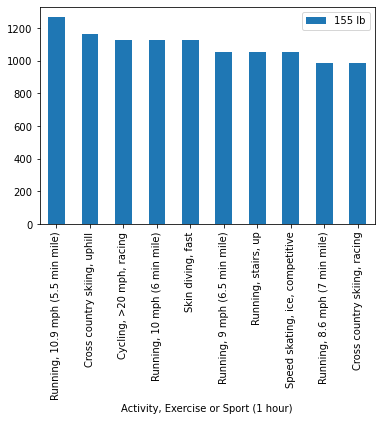

In [11]:
# 155 lbs 
top_ten = ex_df.nlargest(10, '155 lb')
print(top_ten["Activity, Exercise or Sport (1 hour)"])
top_ten.plot(x = 'Activity, Exercise or Sport (1 hour)', y = '155 lb', kind='bar')

47     Running, 10.9 mph (5.5 min mile)
217        Cross country skiing, uphill
2              Cycling, >20 mph, racing
46         Running, 10 mph (6 min mile)
188                   Skin diving, fast
45        Running, 9 mph (6.5 min mile)
51                  Running, stairs, up
212     Speed skating, ice, competitive
44        Running, 8.6 mph (7 min mile)
216        Cross country skiing, racing
Name: Activity, Exercise or Sport (1 hour), dtype: object


<AxesSubplot:xlabel='Activity, Exercise or Sport (1 hour)'>

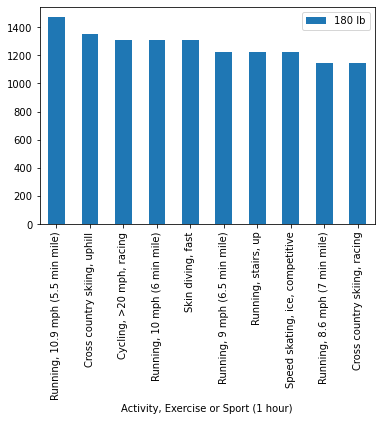

In [12]:
# 180 lbs 
top_ten = ex_df.nlargest(10, '180 lb')
print(top_ten["Activity, Exercise or Sport (1 hour)"])
top_ten.plot(x = 'Activity, Exercise or Sport (1 hour)', y = '180 lb', kind='bar')

47     Running, 10.9 mph (5.5 min mile)
217        Cross country skiing, uphill
2              Cycling, >20 mph, racing
46         Running, 10 mph (6 min mile)
188                   Skin diving, fast
45        Running, 9 mph (6.5 min mile)
51                  Running, stairs, up
212     Speed skating, ice, competitive
44        Running, 8.6 mph (7 min mile)
216        Cross country skiing, racing
Name: Activity, Exercise or Sport (1 hour), dtype: object


<AxesSubplot:xlabel='Activity, Exercise or Sport (1 hour)'>

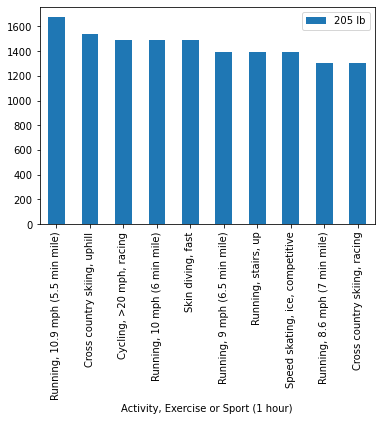

In [13]:
# 205 lbs 
top_ten = ex_df.nlargest(10, '205 lb')
print(top_ten["Activity, Exercise or Sport (1 hour)"])
top_ten.plot(x = 'Activity, Exercise or Sport (1 hour)', y = '205 lb', kind='bar')

In [14]:
# split the data into three subsections
# length of dataframe is 248 so subgroups will be: 82, 83, 83 entries 
ex_df.sort_values('Calories per kg', ascending=False).head() 

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
47,"Running, 10.9 mph (5.5 min mile)",1062,1267,1471,1675,3.706591
217,"Cross country skiing, uphill",974,1161,1348,1536,3.397878
46,"Running, 10 mph (6 min mile)",944,1126,1308,1489,3.294974
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
188,"Skin diving, fast",944,1126,1308,1489,3.294974


In [15]:
# split the data into three subsections
# length of dataframe is 248 so subgroups will be: 82, 83, 83 entries 
sorted_df = ex_df.sort_values('Calories per kg', ascending=False)
sorted_df.reset_index(drop=True, inplace=True)

In [16]:
sorted_df

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Running, 10.9 mph (5.5 min mile)",1062,1267,1471,1675,3.706591
1,"Cross country skiing, uphill",974,1161,1348,1536,3.397878
2,"Running, 10 mph (6 min mile)",944,1126,1308,1489,3.294974
3,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
4,"Skin diving, fast",944,1126,1308,1489,3.294974
...,...,...,...,...,...,...
243,"Sit, playing with animals",148,176,204,233,0.515199
244,Pushing stroller or walking with children,148,176,204,233,0.515199
245,Croquet,148,176,204,233,0.515199
246,"Walking, under 2.0 mph, very slow",118,141,163,186,0.411618


## 3. Group by Activity Intensity 

In [17]:
# split up the dataset into high, medium and low intensity exercises 
#sorted_df["Intensity"] == 3
#lst1 = ['High'] * 82
#lst2 = ['Medium'] * 83
#lst3 = ["Low"] * 83
lst1 = []

for index, row in sorted_df.iterrows():
    if row["Calories per kg"] > 2:
        lst1.append('High')
    elif row["Calories per kg"] > 1:
        lst1.append('Medium')
    else:
        lst1.append('Low')

In [18]:
#lst1.extend(lst2)
#lst1.extend(lst3)
sorted_df["Intensity"] = lst1 

In [19]:
sorted_df[sorted_df["Intensity"] == 'High']

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg,Intensity
0,"Running, 10.9 mph (5.5 min mile)",1062,1267,1471,1675,3.706591,High
1,"Cross country skiing, uphill",974,1161,1348,1536,3.397878,High
2,"Running, 10 mph (6 min mile)",944,1126,1308,1489,3.294974,High
3,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974,High
4,"Skin diving, fast",944,1126,1308,1489,3.294974,High
5,"Running, 9 mph (6.5 min mile)",885,1056,1226,1396,3.089165,High
6,"Running, stairs, up",885,1056,1226,1396,3.089165,High
7,"Speed skating, ice, competitive",885,1056,1226,1396,3.089165,High
8,"Cross country skiing, racing",826,985,1144,1303,2.882679,High
9,"Running, 8.6 mph (7 min mile)",826,985,1144,1303,2.882679,High


In [20]:
sorted_df[sorted_df["Intensity"] == 'Medium']

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg,Intensity
46,"Climbing hills, carrying over 42 lb",531,633,735,838,1.852957,Medium
47,Stair machine,531,633,735,838,1.852957,Medium
48,"Running, 5.2 mph (11.5 minute mile)",531,633,735,838,1.852957,Medium
49,"Running, cross country",531,633,735,838,1.852957,Medium
50,"Ice skating, rapidly",531,633,735,838,1.852957,Medium
...,...,...,...,...,...,...,...
154,Skateboarding,295,352,409,465,1.029722,Medium
155,"Aerobics, low impact",295,352,409,465,1.029722,Medium
156,Snorkeling,295,352,409,465,1.029722,Medium
157,"Carrying infant, upstairs",295,352,409,465,1.029722,Medium


In [21]:
sorted_df[sorted_df["Intensity"] == 'Low']

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg,Intensity
159,Painting,266,317,368,419,0.927494,Low
160,"Weeding, cultivating garden",266,317,368,419,0.927494,Low
161,Badminton,266,317,368,419,0.927494,Low
162,"Golf, walking and carrying clubs",266,317,368,419,0.927494,Low
163,"Basketball, shooting baskets",266,317,368,419,0.927494,Low
...,...,...,...,...,...,...,...
243,"Sit, playing with animals",148,176,204,233,0.515199,Low
244,Pushing stroller or walking with children,148,176,204,233,0.515199,Low
245,Croquet,148,176,204,233,0.515199,Low
246,"Walking, under 2.0 mph, very slow",118,141,163,186,0.411618,Low


## 4. Final Cleanup 

In [22]:
# Last bit of EDA 
# Now that intensity was calculated can remove some unnecessary columns 
sorted_df = sorted_df.drop(columns=["130 lb", "155 lb", "180 lb", "205 lb", "Calories per kg"])
# Rename activities column 
sorted_df = sorted_df.rename(columns={"Activity, Exercise or Sport (1 hour)": "Exercise"})

## 5. Manual Labels with Keywords 

In [23]:
# There's gotta be more of an automated way of doing this, maybe with Megan's recommendation but it seems hard with strings like this
# This honestly wasn't too hard to do 
#Semi - Manual Labelling and Grouping 
# established a set of key words to group each activity 
# each activity category becomes a feature 
# it felt best to do this relatively manually for this particular dataset 

# GYM label 
need_gym = ["weight", "lifting", "machine", "club", "stationary"]

# Activitiy labels 
daily_task = ["gardening", "weeding", "stairs" , "grass", "lawn", "raking" , "playing", "cleaning"]
water_sport = ["water aerobics", "swimming", "boating", "canoeing", "sailing" , "kayaking", "surfing", "crew", "diving" , "snorkeling" , "polo" ]
racing = ["skating", "mph", "competition", "swimming", "boating", "sailing" , "bobsleigh", "cross country", "running", "cycling", "rowing"]
horse = ["horse"]
dance = ["ballroom", "dance", "jazzercise", "ballet"]
target = ["golf", "bowling", "archery" , "curling"]
combat = ["boxing", "jitsu", "wrestling", "taekwondo"]
net = ["volleyball", "tennis", "squash"]
ball_puck = ["ball", "lacrosse", "hockey" , "rugby", "soccer", "waterpolo", "jai alai"]
# fitness goal labels
endurance = racing + combat + ball_puck
endurance_adds = ["rock", "climbing", "stairs", "tennis", "jumping"]
endurance = endurance + endurance_adds
core = water_sport
core_adds = ["soccer", "volleyball", "gymnastics", "yoga", "cross-country"]
core = core + core_adds
flexibility = dance
flexibility_adds = ["swimming", "diving"]
flexibility = flexibility + flexibility_adds
balance = dance + combat
strength = dance + combat + racing

In [24]:
activities = sorted_df["Exercise"].tolist()

In [25]:
# function that concatenates labels accordingly 
# 2D list of all activity labels 
activity_labels = {"Gym":need_gym, "Daily Tasks": daily_task, "Water Sports": water_sport, "Racing": racing,
              "Horse": horse, "Dance": dance, "Target": target, "Combat": combat, "Net": net, "Ball or Puck": ball_puck, "Improve Endurance": endurance,
                  "Strengthen Core": core, "Improve Flexibility": flexibility, "Improve Balance": balance, "Build Muscle Strength": strength}

def sort_activity(df, labels, acts):
    # correctly groups before joining 
    for key, value in labels.items():
        # add key to brand new dictionary 
        key_lst = [] 
        # value of labels 
        new_value = '|'.join(value)
        for i in range(len(acts)): 
            act = acts[i] # specific activity we are reading in 
            # if specific activity contains one of the label strings in this group, add to sub grouping
            if re.search(new_value, act.lower()):
                # activity in sub group
                key_lst.append(1)
            else: 
                # activity not in sub group 
                key_lst.append(0)
        # data for particular column 
        # convert list for all activities for that particular label ("key")
        df[key] = key_lst
    return df
        
    # takes in list of keywords, and the column of activities 
    # runs through the activities row by row 
new_df = sort_activity(sorted_df, activity_labels, activities)
new_df.head(30)


,Exercise,Intensity,Gym,Daily Tasks,Water Sports,Racing,Horse,Dance,Target,Combat,Net,Ball or Puck,Improve Endurance,Strengthen Core,Improve Flexibility,Improve Balance,Build Muscle Strength
0,"Running, 10.9 mph (5.5 min mile)",High,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,"Cross country skiing, uphill",High,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,"Running, 10 mph (6 min mile)",High,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,"Cycling, >20 mph, racing",High,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,"Skin diving, fast",High,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
5,"Running, 9 mph (6.5 min mile)",High,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
6,"Running, stairs, up",High,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
7,"Speed skating, ice, competitive",High,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
8,"Cross country skiing, racing",High,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
9,"Running, 8.6 mph (7 min mile)",High,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
